In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [3]:
dataset = pd.read_csv("C:/Users/sumit/OneDrive/Desktop/Social_Network_Ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

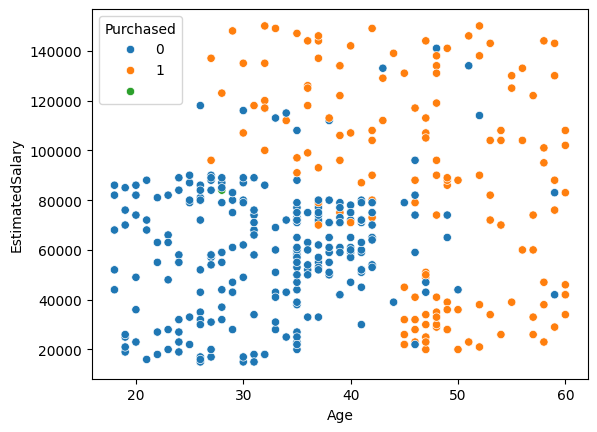

In [25]:
sns.scatterplot(data=dataset,x="Age",y="EstimatedSalary",hue="Purchased")
plt.show()

In [5]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = MinMaxScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
dt.score(x_test,y_test)*100 , dt.score(x_train,y_train)*100      #overfitted model

(83.75, 99.6875)

In [20]:
dt.predict([[35,20000]])

C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['1'], dtype=object)

In [21]:
#19,19000 0 1
#35 20000 0 1

In [40]:
#plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
#plt.show()

In [22]:
from sklearn.tree import plot_tree

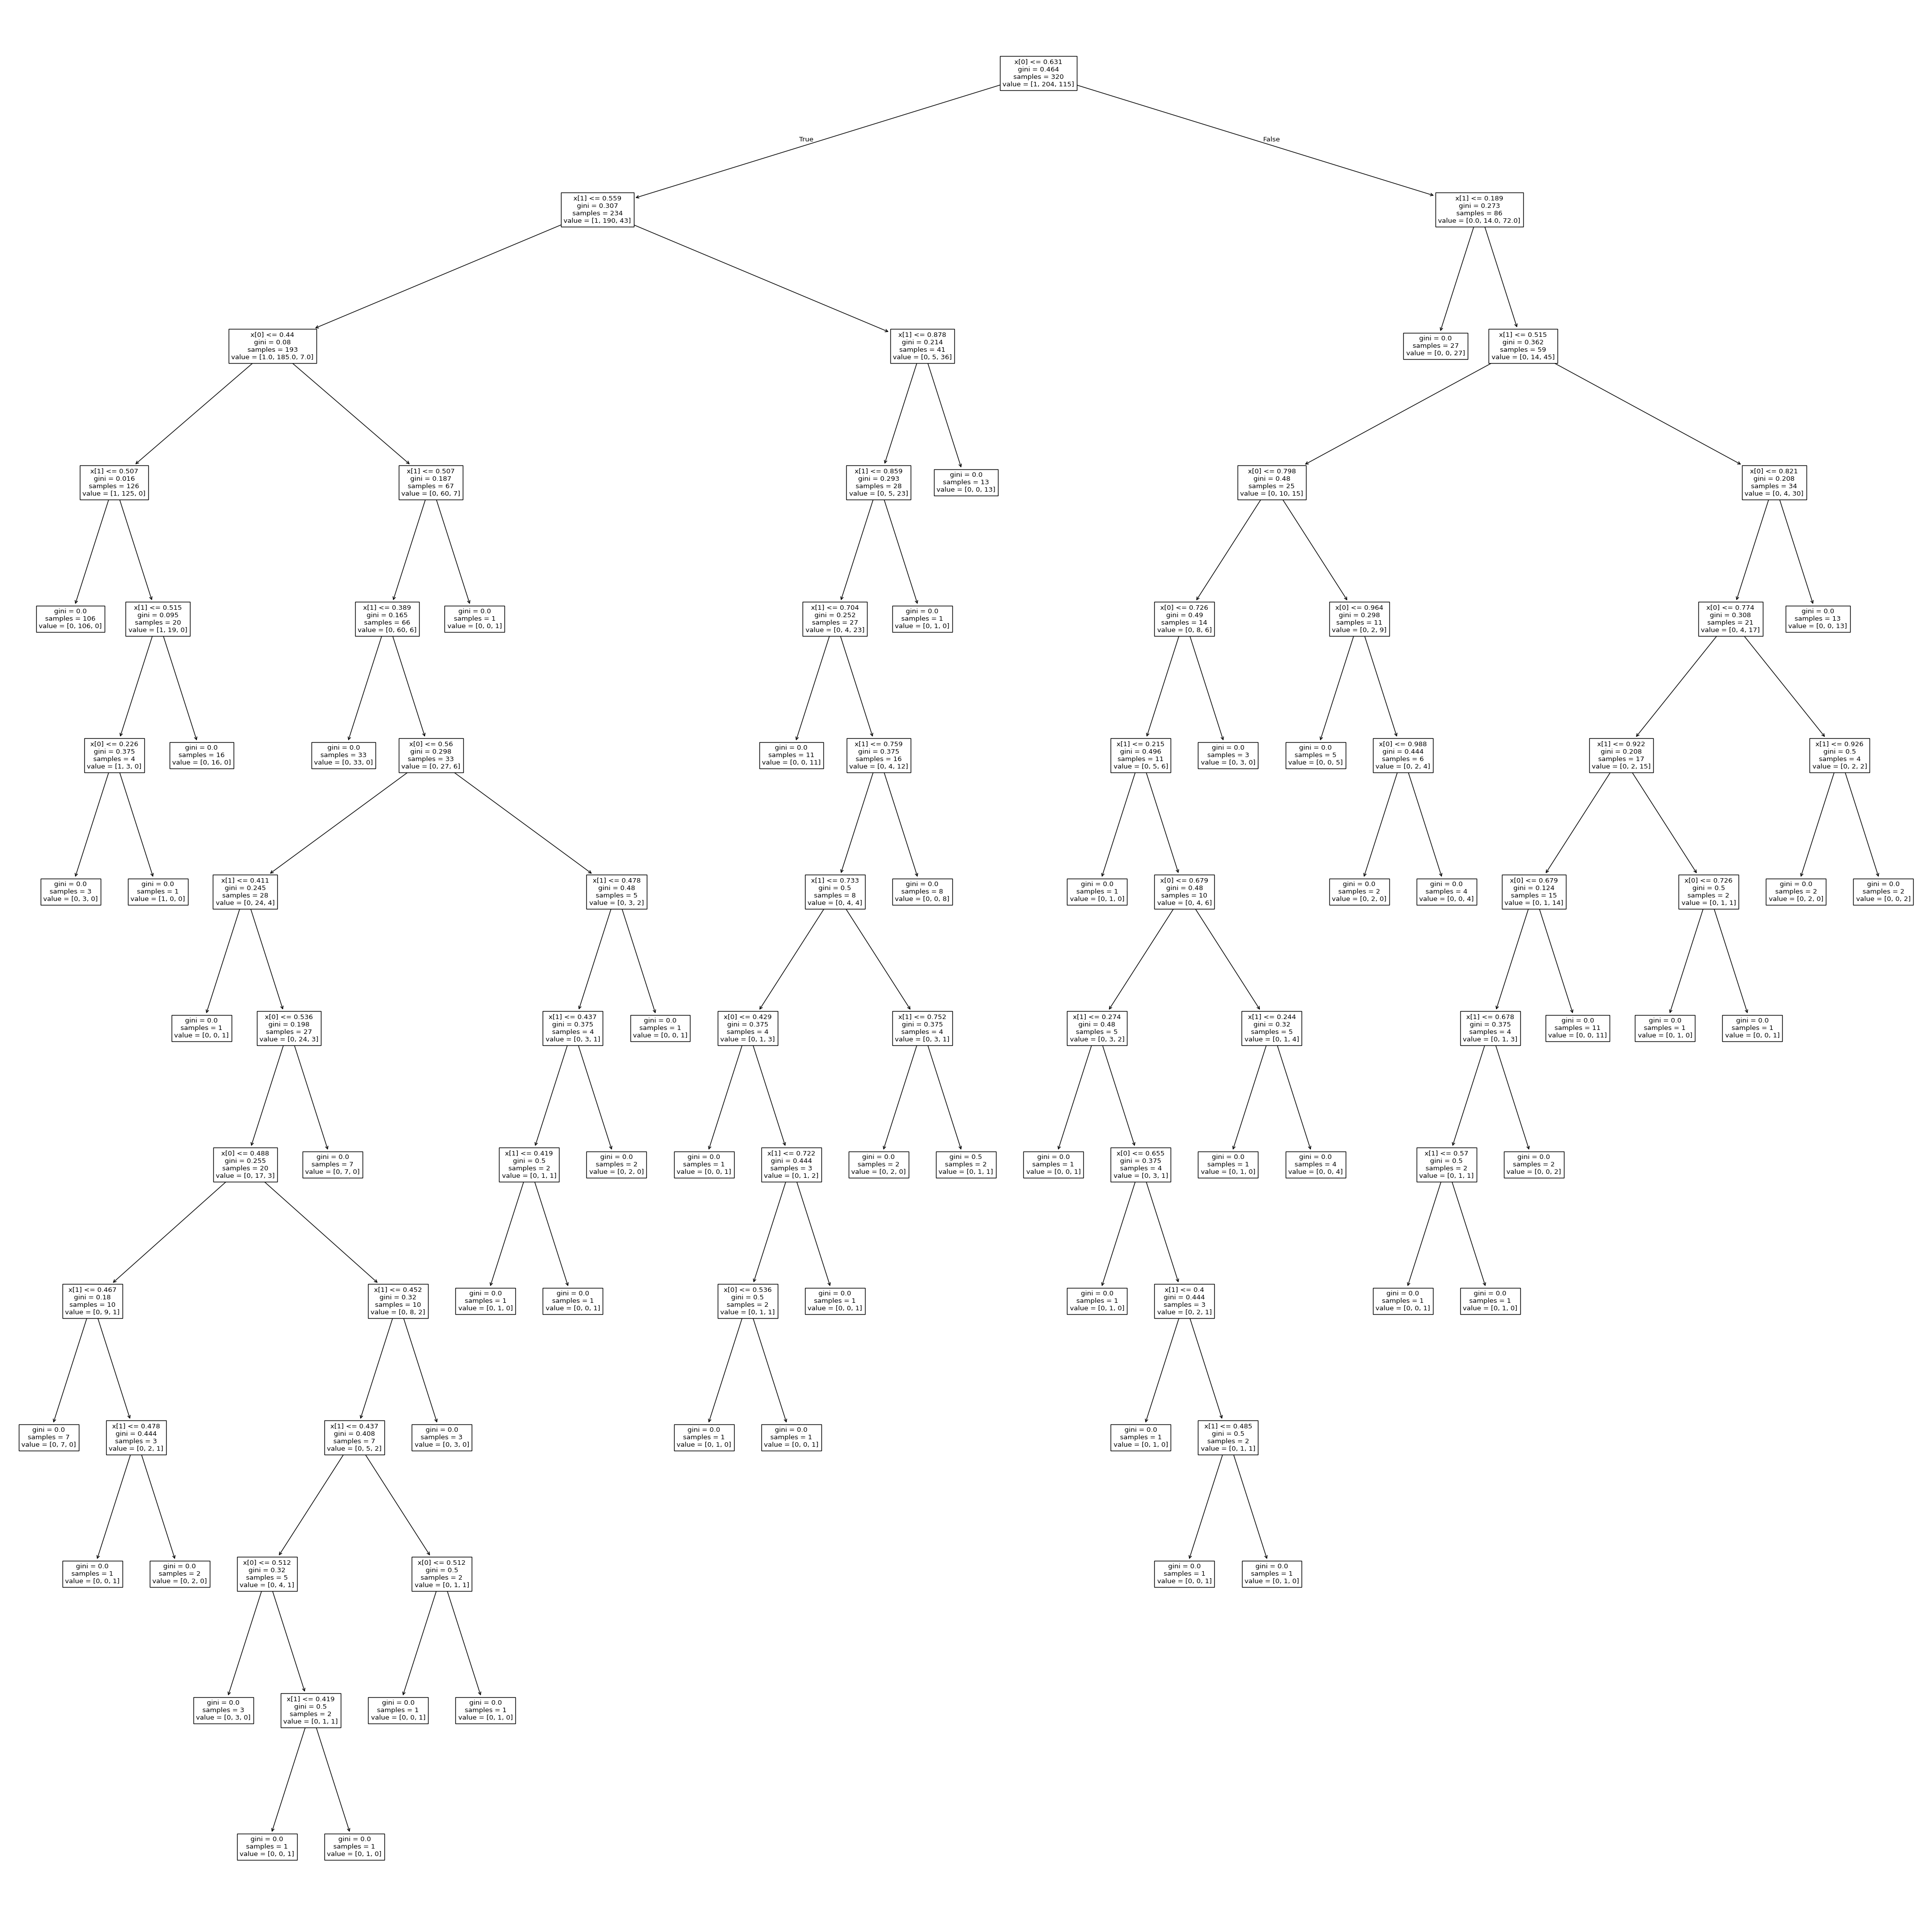

In [24]:
plt.figure(figsize = (50,50))
plot_tree(dt)
plt.show()

In [39]:
print(y.unique())


[0 1]


# pre pruning

In [49]:
dt1 = DecisionTreeClassifier(max_depth = 5)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [50]:
dt1.score(x_test,y_test)*100 , dt1.score(x_train,y_train)*100      

(90.0, 93.125)

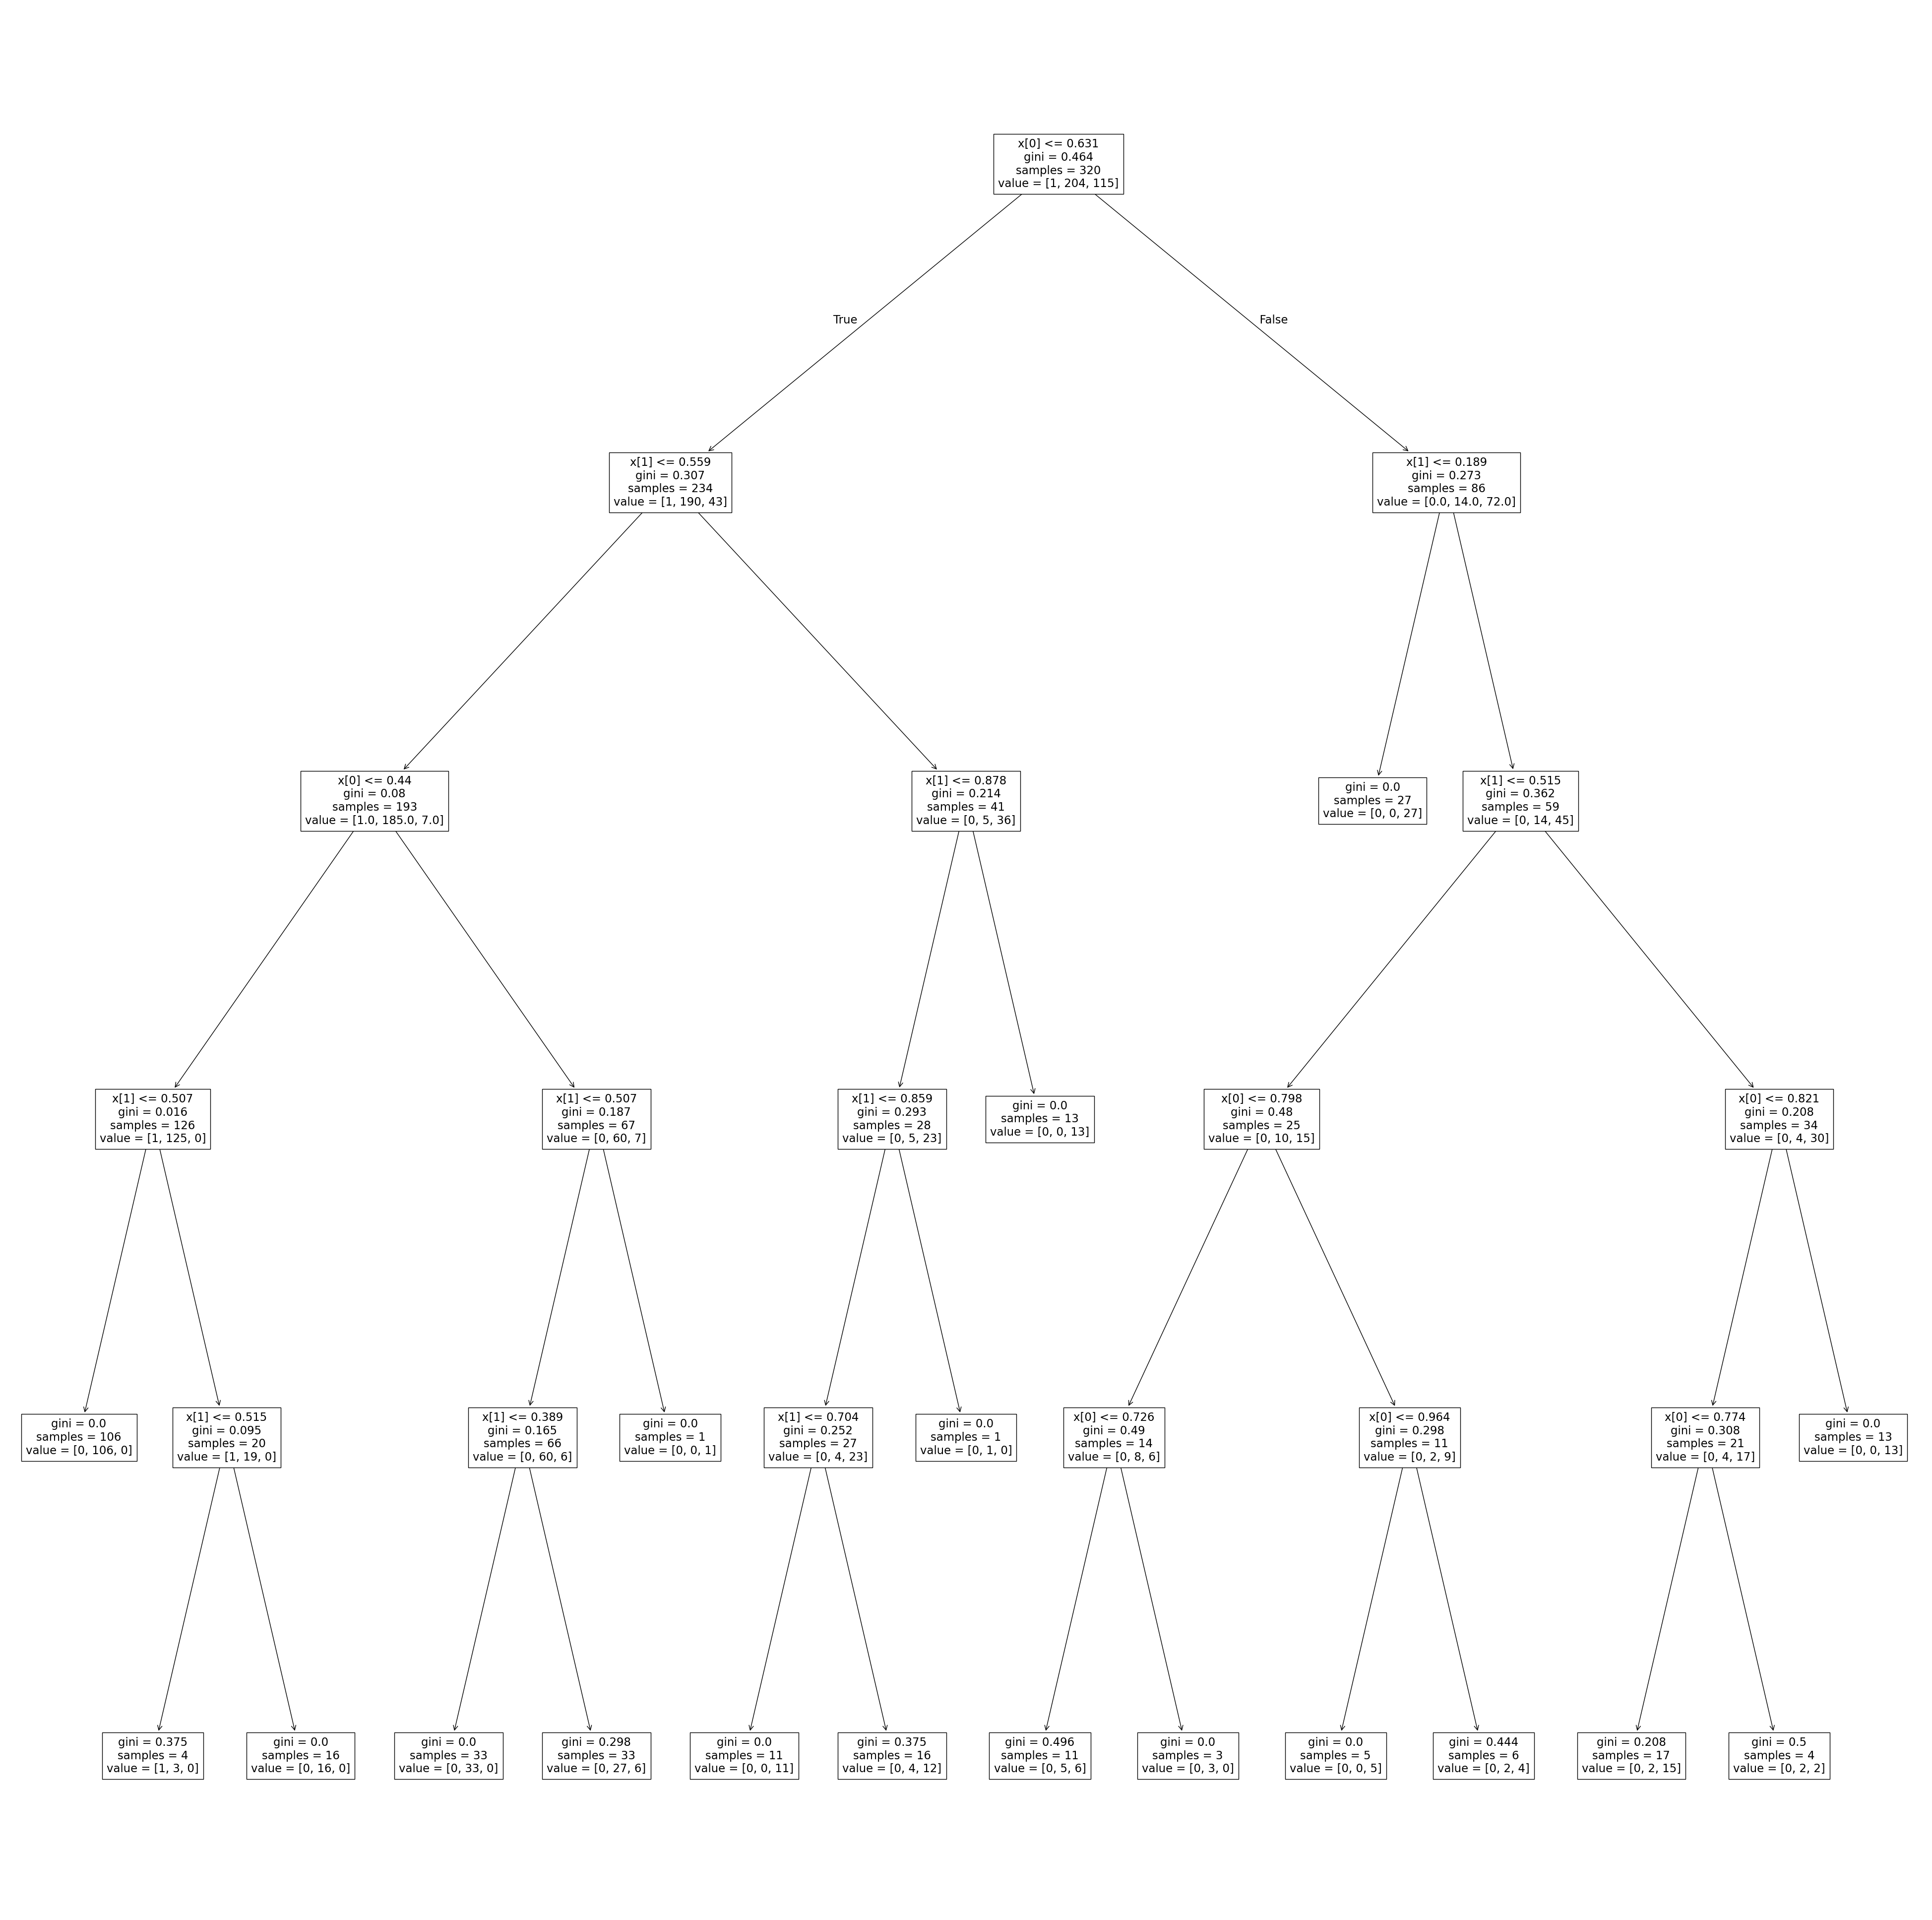

In [51]:
plt.figure(figsize = (50,50))
plot_tree(dt1)
plt.show()

# post pruning

In [60]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train)*100,dt2.score(x_test,y_test)*100,i)

81.875 90.0 1
91.5625 91.25 2
91.5625 91.25 3
92.8125 91.25 4
93.125 90.0 5
95.0 86.25 6
96.875 85.0 7
97.1875 85.0 8
98.125 85.0 9
98.4375 85.0 10
99.0625 83.75 11
99.0625 83.75 12
99.375 83.75 13
99.6875 83.75 14
99.6875 83.75 15
99.6875 83.75 16
99.6875 83.75 17
99.6875 83.75 18
99.6875 83.75 19


In [64]:
dt2 = DecisionTreeClassifier(max_depth = 3)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
dt2.score(x_test,y_test)*100 , dt2.score(x_train,y_train)*100

(91.25, 91.5625)

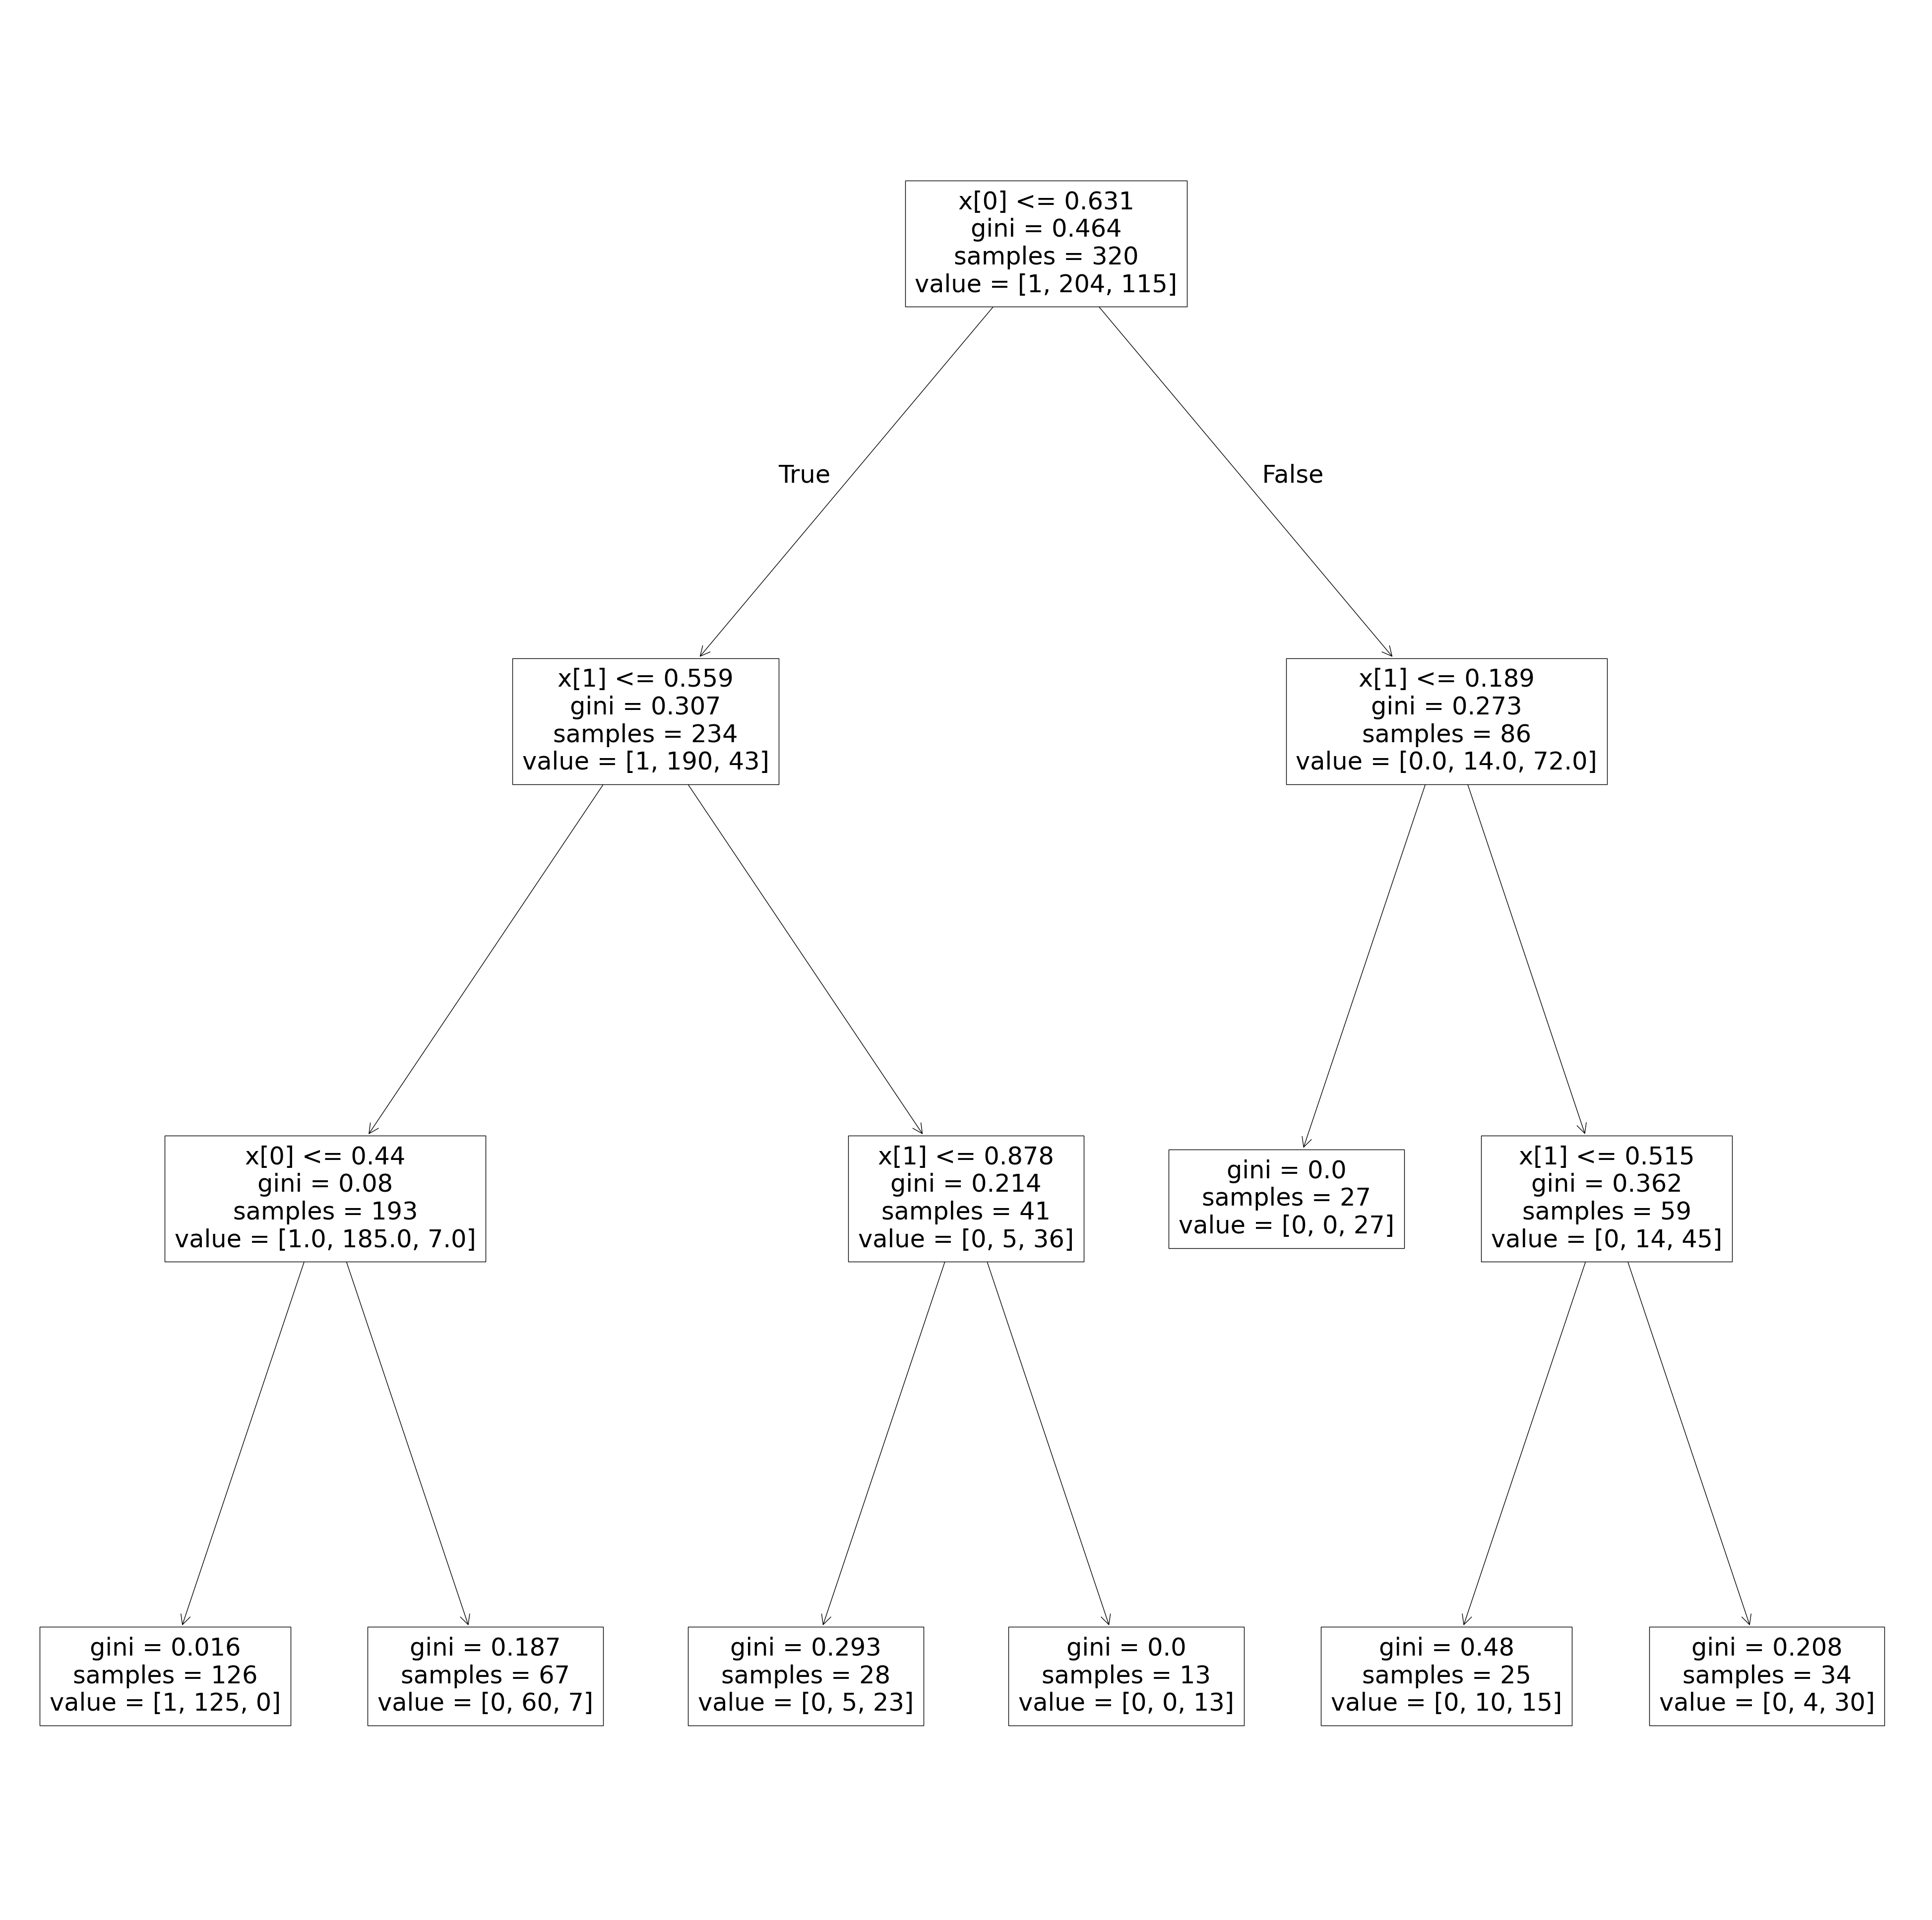

In [66]:
plt.figure(figsize = (50,50))
plot_tree(dt2)
plt.show()